In [1]:
import pandas as pd
import numpy as np
DATA_PATH = '/src/odor_grin_lens/data/'
neuro_file = DATA_PATH + '020123_A62Nt_neuronal traces.csv'
meta_file = DATA_PATH + '020123_A62Nt_odorpresentation.csv'

In [4]:
neuro_data = pd.read_csv(neuro_file, header=None)
neuro_data.columns = ['time'] + [*neuro_data.columns[1:]]
meta_data = pd.read_csv(meta_file, header=None, names=['odor_id', 'ts'])


In [23]:
neuro_max = []
neuro_mean = []
for i, row in meta_data.iterrows():
    neuro_max.append(
        neuro_data.loc[(neuro_data.time > row.ts) & (neuro_data.time < row.ts + 15)].iloc[:, 1:].to_numpy().max(axis=0)
    )
    neuro_mean.append(
        neuro_data.loc[(neuro_data.time > row.ts) & (neuro_data.time < row.ts + 5)].iloc[:, 1:].to_numpy().mean(axis=0)
    )
neuro_max = np.stack(neuro_max)
neuro_mean = np.stack(neuro_mean)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
X = neuro_max
y = meta_data.odor_id

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, random_state=0, stratify=y)
model = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train)


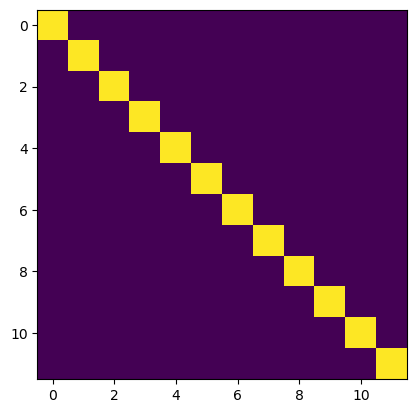

In [63]:
plt.imshow(confusion_matrix(y_train, model.predict(X_train)))

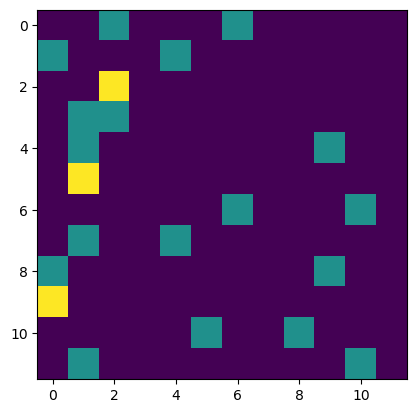

In [64]:
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))

In [48]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA().fit(X.T)

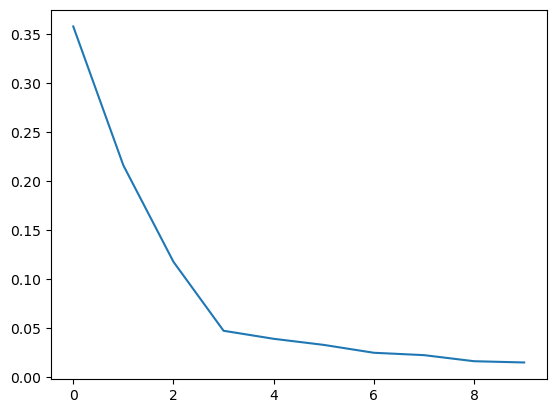

In [57]:
plt.plot(pca.explained_variance_ratio_[:10])

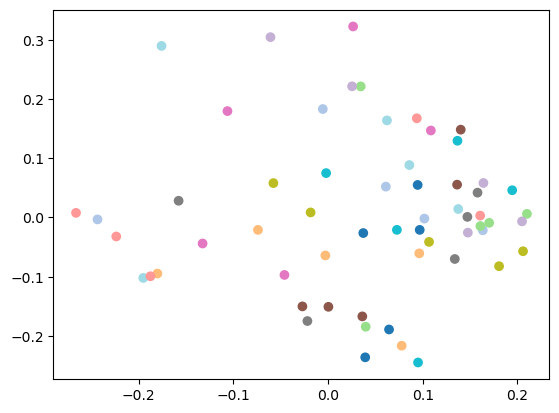

In [59]:
plt.scatter(pca.components_[0], pca.components_[1], c=y, cmap='tab20')

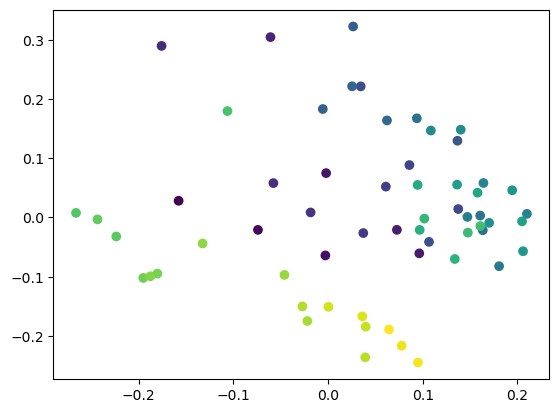

In [61]:
plt.scatter(pca.components_[0], pca.components_[1], c=meta_data.ts)